In [56]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
### Estudiante: Ana Paulina Olivares Álvarez

#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [57]:
def regula_falsi(f, a, b, tol = 1e-6, maxiter = 100):

  '''
  Encontrar una raíz de una función f en el itervalo [a, b] utilizando el método de regula falsi
  Entradas:
    f: función a evaluar
    a: extremo intervalo
    b: extremo intervalo
  Retorna:
    c: raíz aproximada
    i: número de iteraciones
  '''

  if f(a) * f(b) > 0: # garantizar que f(a) y f(b) tienen signos opuestos
    raise ValueError('En el intervalo no hay raíz')
  else:
    for i in range(maxiter):
      fa, fb = f(a), f(b)
      c = (a * fb - b * fa) / (fb - fa) # calcular el punto de intersección
      fc = f(c)

      if fc == 0 or abs(fc) < tol: # criterio de parada
        return c, i+1 # retorna la raíz y el número real de iteraciones
      elif fc * fa > 0: # si tienen el mismo signo
        a = c
      elif fc * fb > 0:
        b = c

  raise RuntimeError('Máximo de iteraciones alcanzado')

In [58]:
f = lambda x: x**2 - 4
raiz = regula_falsi(f, 0, 2)
print(f'La raíz es: {raiz}')

La raíz es: (2.0, 1)


In [59]:
tolerancia = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14, 1e-16, 1e-18]
lista = []

for tol in tolerancia:
  raiz, iteraciones = regula_falsi(f, 0, 3, tol = tol)
  lista.append((raiz, iteraciones, tolerancia)) # se utiliza una tupla para retornar varios valores de la función
  print(f'La raíz es: {raiz} con {iteraciones} iteraciones y una tolerancia de {tol}')

La raíz es: 1.99872040946897 con 5 iteraciones y una tolerancia de 0.01
La raíz es: 1.9999897600262146 con 8 iteraciones y una tolerancia de 0.0001
La raíz es: 1.9999999180800017 con 11 iteraciones y una tolerancia de 1e-06
La raíz es: 1.9999999993446398 con 14 iteraciones y una tolerancia de 1e-08
La raíz es: 1.9999999999947573 con 17 iteraciones y una tolerancia de 1e-10
La raíz es: 1.9999999999997904 con 19 iteraciones y una tolerancia de 1e-12
La raíz es: 1.9999999999999982 con 22 iteraciones y una tolerancia de 1e-14
La raíz es: 2.0 con 24 iteraciones y una tolerancia de 1e-16
La raíz es: 2.0 con 24 iteraciones y una tolerancia de 1e-18


# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

In [60]:
def fuerza(a, x):

  '''
  Calcula la fuerza eléctrica en una distribución uniforme alrededor de un conductor en forma de anillo.
  Entradas:
    a: radio del anillo
    x: posición de la carga en el eje x
  Retorna:
    F: valor de la fuerza eléctrica
  '''

  epsilon_0 = 8.854e-12
  q = 2e-5
  Q = 2e-5

  F = 1/(4*np.pi*epsilon_0)*(q*Q*x)/(x**2 + a**2)**(3/2)

  return F

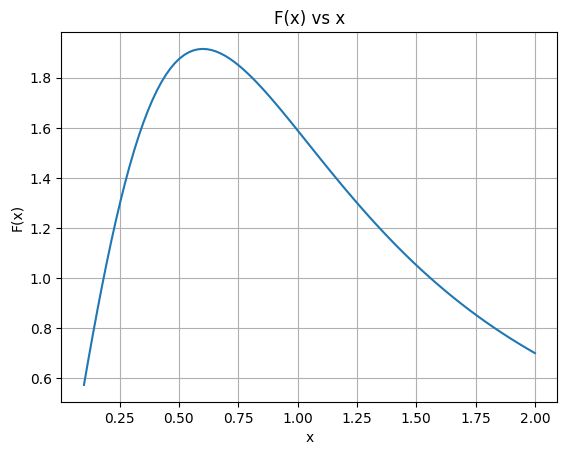

In [61]:
a = 0.85
x = np.linspace(0.1, 2, 100)
F = fuerza(a, x)

plt.plot(x, F)
plt.title('F(x) vs x')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()
plt.show()

In [62]:
from scipy.optimize import newton, bisect

In [63]:
a = 0.85

def f(x):
  return fuerza(a, x) - 1.25

In [64]:
newton?

In [65]:
#Método Newton-Raphson
raiz_newton = newton(f, x0 = 0.5)
print(f'La raíz por método de Newton-Rapshon es: {raiz_newton}')

La raíz por método de Newton-Rapshon es: 0.23944273854159115


In [66]:
# Método Secante
raiz_secante = newton(f, x0 = 0.2, x1 = 0.5)
print(f'La raíz por método de Secante es: {raiz_secante}')

La raíz por método de Secante es: 0.23944273854153675


In [67]:
# Si se disminuye el radio, la fuerza aumenta, veamoslo con la sig gráfica:

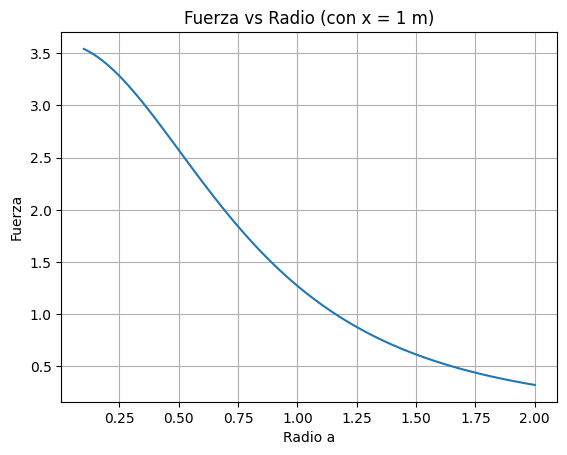

In [68]:
x = 1
a = np.linspace(0.1, 2, 100)
F = fuerza(a, x)

plt.plot(a, F)
plt.title('Fuerza vs Radio (con x = 1 m)')
plt.xlabel('Radio a')
plt.ylabel('Fuerza')
plt.grid()
plt.show()

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



In [69]:
g = 9.81
t = 0

def vel_ascendente(u, q, m0, t):

  '''
  Calcula la velocidad ascendente de un cohete.
  Entradas:
    u: velocidad a la que se expulsa el combustible
    q: razón de consumo del combustible
    m0: masa inicial del cohete en t = 0
    t: tiempo
  Salida:
    v: velocidad ascendente
  '''

  v = u * np.log(m0 / (m0 - q * t)) - g * t

  return v

<ipython-input-69-5605d42f47a3>:17: RuntimeWarning: divide by zero encountered in divide
  v = u * np.log(m0 / (m0 - q * t)) - g * t


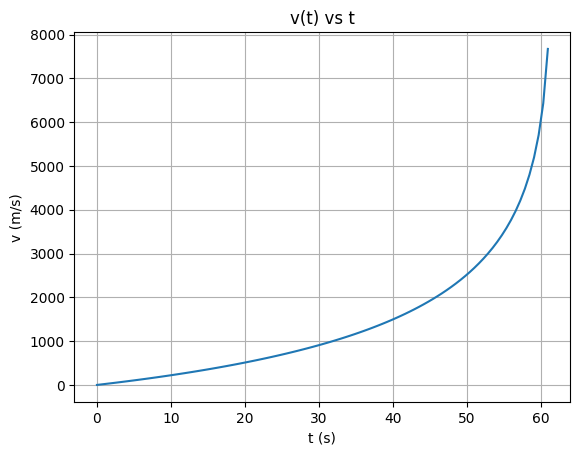

In [70]:
m0 = 1.6e5
u = 1800
q = 2600

t_max = m0 / q

t = np.linspace(0, t_max, 100)
v = vel_ascendente(u, q, m0, t)

plt.plot(t, v)
plt.title('v(t) vs t')
plt.xlabel('t (s)') # revisar unidades
plt.ylabel('v (m/s)')
plt.grid()
plt.show()

In [71]:
v = 750

def f(t):
  return vel_ascendente(u, q, m0, t) - v

In [72]:
# Método Regula-Falsi
raiz_rg = regula_falsi(f, a = 20, b = 30)
print(f'La raíz por método de Regula-Falsi es: {raiz_rg}')

La raíz por método de Regula-Falsi es: (np.float64(26.407847954268806), 8)


In [73]:
#Método Newton-Raphson
raiz_newton = newton(f, x0 = 30)
print(f'La raíz por método de Newton-Rapshon es: {raiz_newton}')

La raíz por método de Newton-Rapshon es: 26.40784795596704


In [74]:
# Método Bisección
raiz_biseccion = bisect(f, a = 20, b = 30)
print(f'La raíz por método de Bisección es: {raiz_biseccion}')

La raíz por método de Bisección es: 26.407847955966872


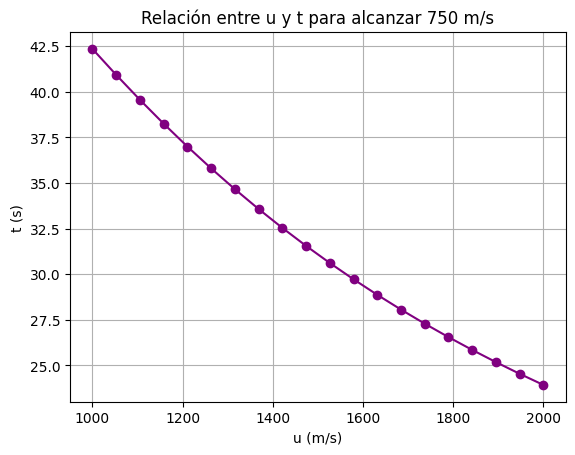

In [75]:
u = np.linspace(1000, 2000, 20)
t = []

for i in u:

  def f(t):
    return vel_ascendente(i, q, m0, t) - v

  raiz = bisect(f, a = 1, b = 60)
  t.append(raiz)

plt.plot(u, t, marker='o', color = 'purple')
plt.xlabel('u (m/s)')
plt.ylabel('t (s)')
plt.title("Relación entre u y t para alcanzar 750 m/s")
plt.grid()
plt.show()